# Частный случай матрицы A, вычисление псевдообратной для решения СЛАУ.

Предположим, что у нас есть система линейных уравнений вида:

**Ax = b**,


Пусть A - **эрмитова положительно определенная** матрица размером n x n, x - вектор неизвестных, и b - известный вектор правой части. Для решения уравнения нужно вычислить псевдообратную матрицу:
$A^+ = (A^T A)^{-1} A^T$

Вычислим ее несколькими способами: методом Холецкого, SVD, и с помощью разложения Шура. 

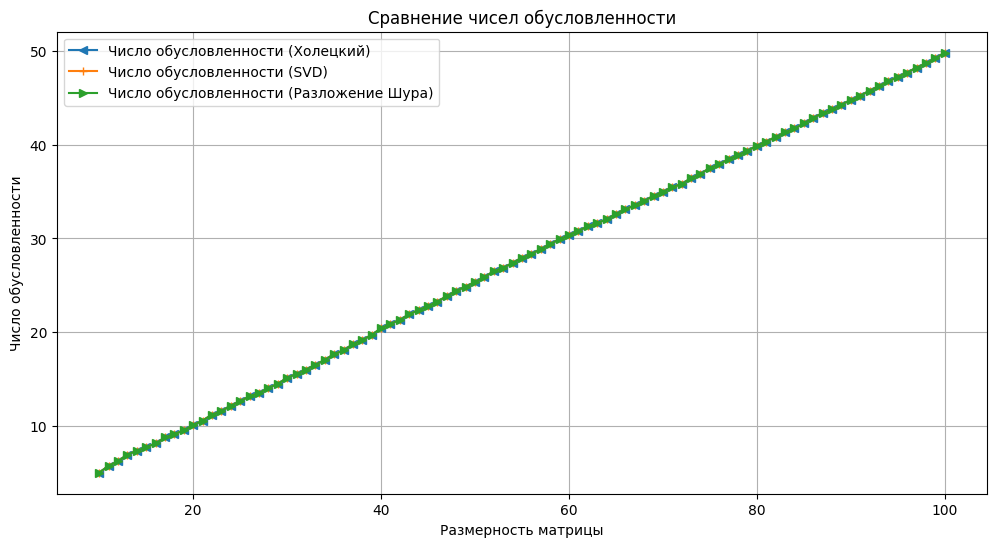

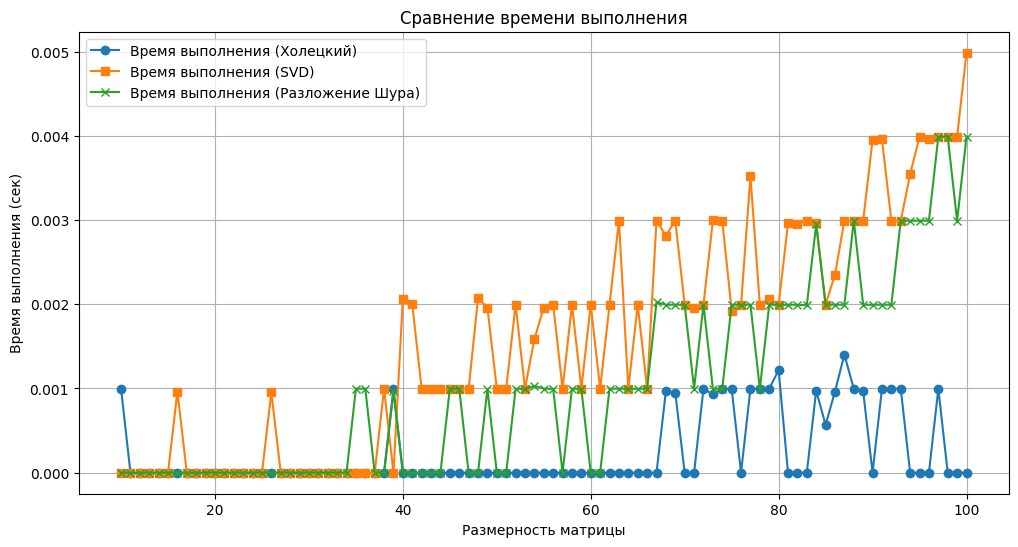

In [19]:
import numpy as np
from scipy.linalg import cholesky, schur
from numpy.linalg import svd
import matplotlib.pyplot as plt
import time

# Функция для вычисления числа обусловленности
def compute_condition_number(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
    return condition_number

# Инициализация списков для сохранения чисел обусловленности и времени выполнения
dimensions = []
condition_numbers_cholesky = []
condition_numbers_svd = []
condition_numbers_schur = []
execution_times_cholesky = []
execution_times_svd = []
execution_times_schur = []

# Размерности матриц, которые мы будем рассматривать
matrix_sizes = range(10, 101)

for n in matrix_sizes:
    # Создадим случайную эрмитову положительно определенную матрицу A
    np.random.seed(0)
    A = np.random.rand(n, n)
    A = np.dot(A, A.T)
    A = A + np.eye(n)

    dimensions.append(n)
    
    # Измерим время выполнения и вычислим число обусловленности для метода Холецкого
    start_time = time.time()
    cholesky(A)
    execution_time_cholesky = time.time() - start_time
    execution_times_cholesky.append(execution_time_cholesky)
    condition_numbers_cholesky.append(compute_condition_number(A))
    
    # Измерим время выполнения и вычислим число обусловленности для метода SVD
    start_time = time.time()
    svd(A, full_matrices=False)
    execution_time_svd = time.time() - start_time
    execution_times_svd.append(execution_time_svd)
    condition_numbers_svd.append(compute_condition_number(A))
    
    # Измерим время выполнения и вычислим число обусловленности для метода на основе разложения Шура
    start_time = time.time()
    _, _ = schur(A)
    execution_time_schur = time.time() - start_time
    execution_times_schur.append(execution_time_schur)
    condition_numbers_schur.append(compute_condition_number(A))

# Построим графики чисел обусловленности
plt.figure(figsize=(12, 6))
plt.plot(dimensions, condition_numbers_cholesky, label="Число обусловленности (Холецкий)", marker='<')
plt.plot(dimensions, condition_numbers_svd, label="Число обусловленности (SVD)", marker='+')
plt.plot(dimensions, condition_numbers_schur, label="Число обусловленности (Разложение Шура)", marker='>')

plt.xlabel('Размерность матрицы')
plt.ylabel('Число обусловленности')
plt.title('Сравнение чисел обусловленности')
plt.legend()
plt.grid(True)
plt.show()

# Построим графики времени выполнения
plt.figure(figsize=(12, 6))
plt.plot(dimensions, execution_times_cholesky, label="Время выполнения (Холецкий)", marker='o')
plt.plot(dimensions, execution_times_svd, label="Время выполнения (SVD)", marker='s')
plt.plot(dimensions, execution_times_schur, label="Время выполнения (Разложение Шура)", marker='x')

plt.xlabel('Размерность матрицы')
plt.ylabel('Время выполнения (сек)')
plt.title('Сравнение времени выполнения')
plt.legend()
plt.grid(True)
plt.show()





**Выводы:**
- Число обусловленности матрицы растет с увеличением размерности матрицы для всех методов.
- Методы Холецкого, как правило, является более быстрым с точки зрения времени выполнения, особенно для больших матриц.

Теперь рассмотрим случай, когда мы можем вычислить обратную матрицу. Сравним метод Холецкого вычисления псевдообратной матрицы с вычислением обратной с помощью LU-разложения.

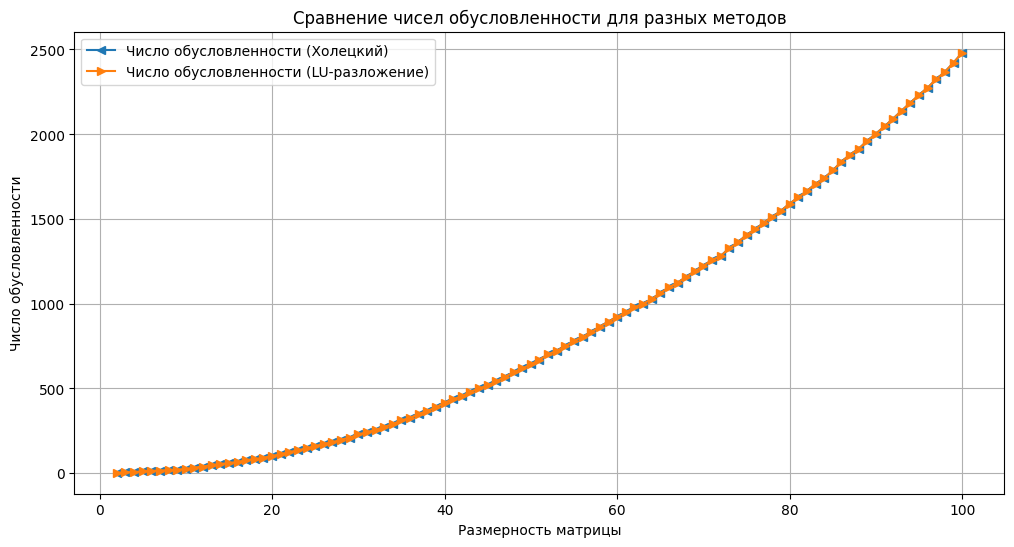

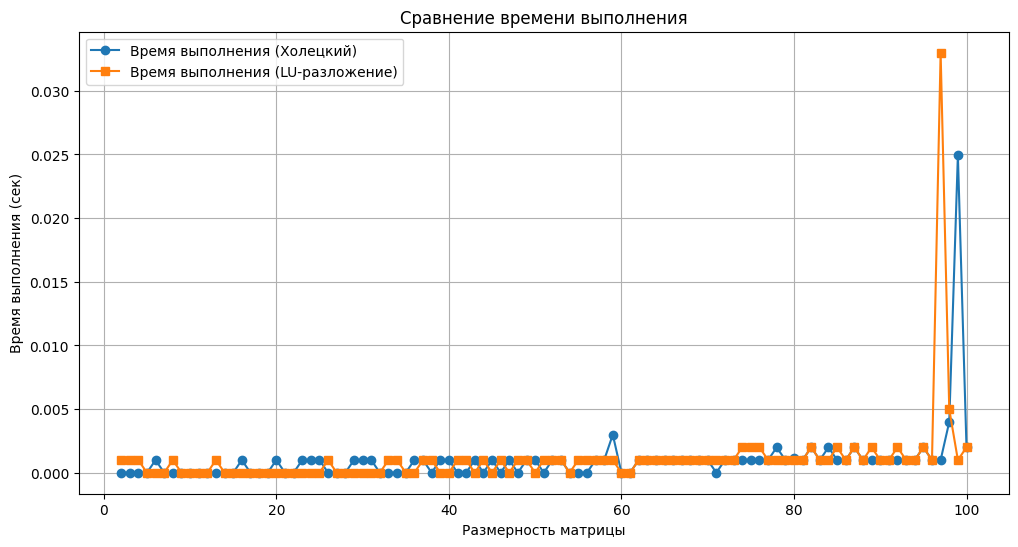

In [18]:
import numpy as np
from scipy.linalg import cholesky, lu
import time
import matplotlib.pyplot as plt

# Инициализация списков для сохранения числа обусловленности и времени выполнения
dimensions = []
condition_numbers_cholesky = []
condition_numbers_lu = []
execution_times_cholesky = []
execution_times_lu = []

# Размерности матриц, которые мы будем рассматривать
matrix_sizes = range(2, 101)

for n in matrix_sizes:
    # Создадим случайную эрмитову положительно определенную матрицу A
    np.random.seed(0)
    A = np.random.rand(n, n)
    A = np.dot(A, A.T)
    A = A + np.eye(n)

    dimensions.append(n)
    
    # Измерим время выполнения и вычислим число обусловленности для метода Холецкого
    start_time = time.time()
    L = cholesky(A)
    A_pseudo_cholesky = np.linalg.solve(L.T, np.linalg.solve(L, np.eye(n)))
    execution_time_cholesky = time.time() - start_time
    condition_numbers_cholesky.append(np.linalg.cond(A))
    
    # Измерим время выполнения и вычислим число обусловленности для метода LU-разложения
    start_time = time.time()
    P, L, U = lu(A)
    A_inv_lu = np.linalg.solve(U, np.linalg.solve(L, np.dot(P, np.eye(n))))
    execution_time_lu = time.time() - start_time
    condition_numbers_lu.append(np.linalg.cond(A))
    
    execution_times_cholesky.append(execution_time_cholesky)
    execution_times_lu.append(execution_time_lu)

# Построим графики
plt.figure(figsize=(12, 6))
plt.plot(dimensions, condition_numbers_cholesky, label="Число обусловленности (Холецкий)", marker='<')
plt.plot(dimensions, condition_numbers_lu, label="Число обусловленности (LU-разложение)", marker='>')

plt.xlabel('Размерность матрицы')
plt.ylabel('Число обусловленности')
plt.title('Сравнение чисел обусловленности для разных методов')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(dimensions, execution_times_cholesky, label="Время выполнения (Холецкий)", marker='o')
plt.plot(dimensions, execution_times_lu, label="Время выполнения (LU-разложение)", marker='s')

plt.xlabel('Размерность матрицы')
plt.ylabel('Время выполнения (сек)')
plt.title('Сравнение времени выполнения')
plt.legend()
plt.grid(True)
plt.show()


**Выводы:**
- Видно, что и по скорости, и по числу обусловленности метод Холецкого для вычисления псевдообратной матрицы ничем не уступает вычислению обратной.